# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [92]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [93]:
# loading the data: Wholesale customers data
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [95]:
#channel y region son categoricas y habrá que agruparlas
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [96]:
df.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [97]:
df.isnull().sum() #no hay nulos

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [98]:
dfnum=df.drop(['Channel','Region'],axis=1)
dfnum.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


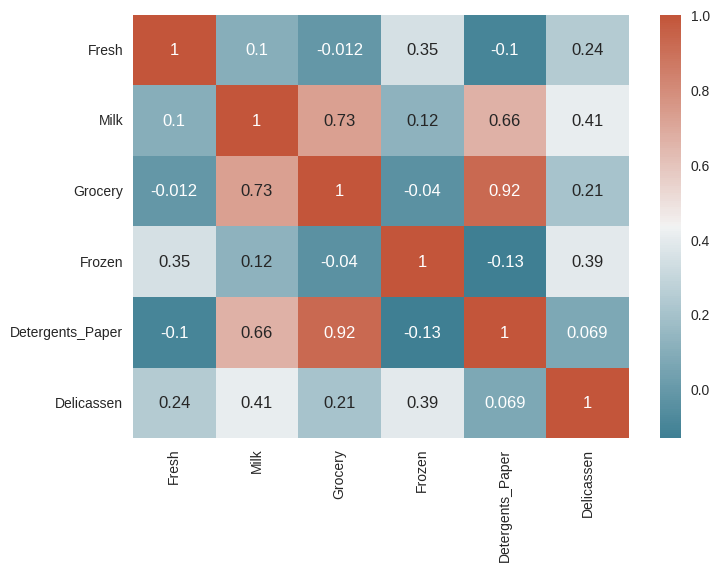

In [99]:
sns.heatmap(dfnum.corr(),annot=True,cmap= sns.diverging_palette(220, 20, n=200))
plt.show()

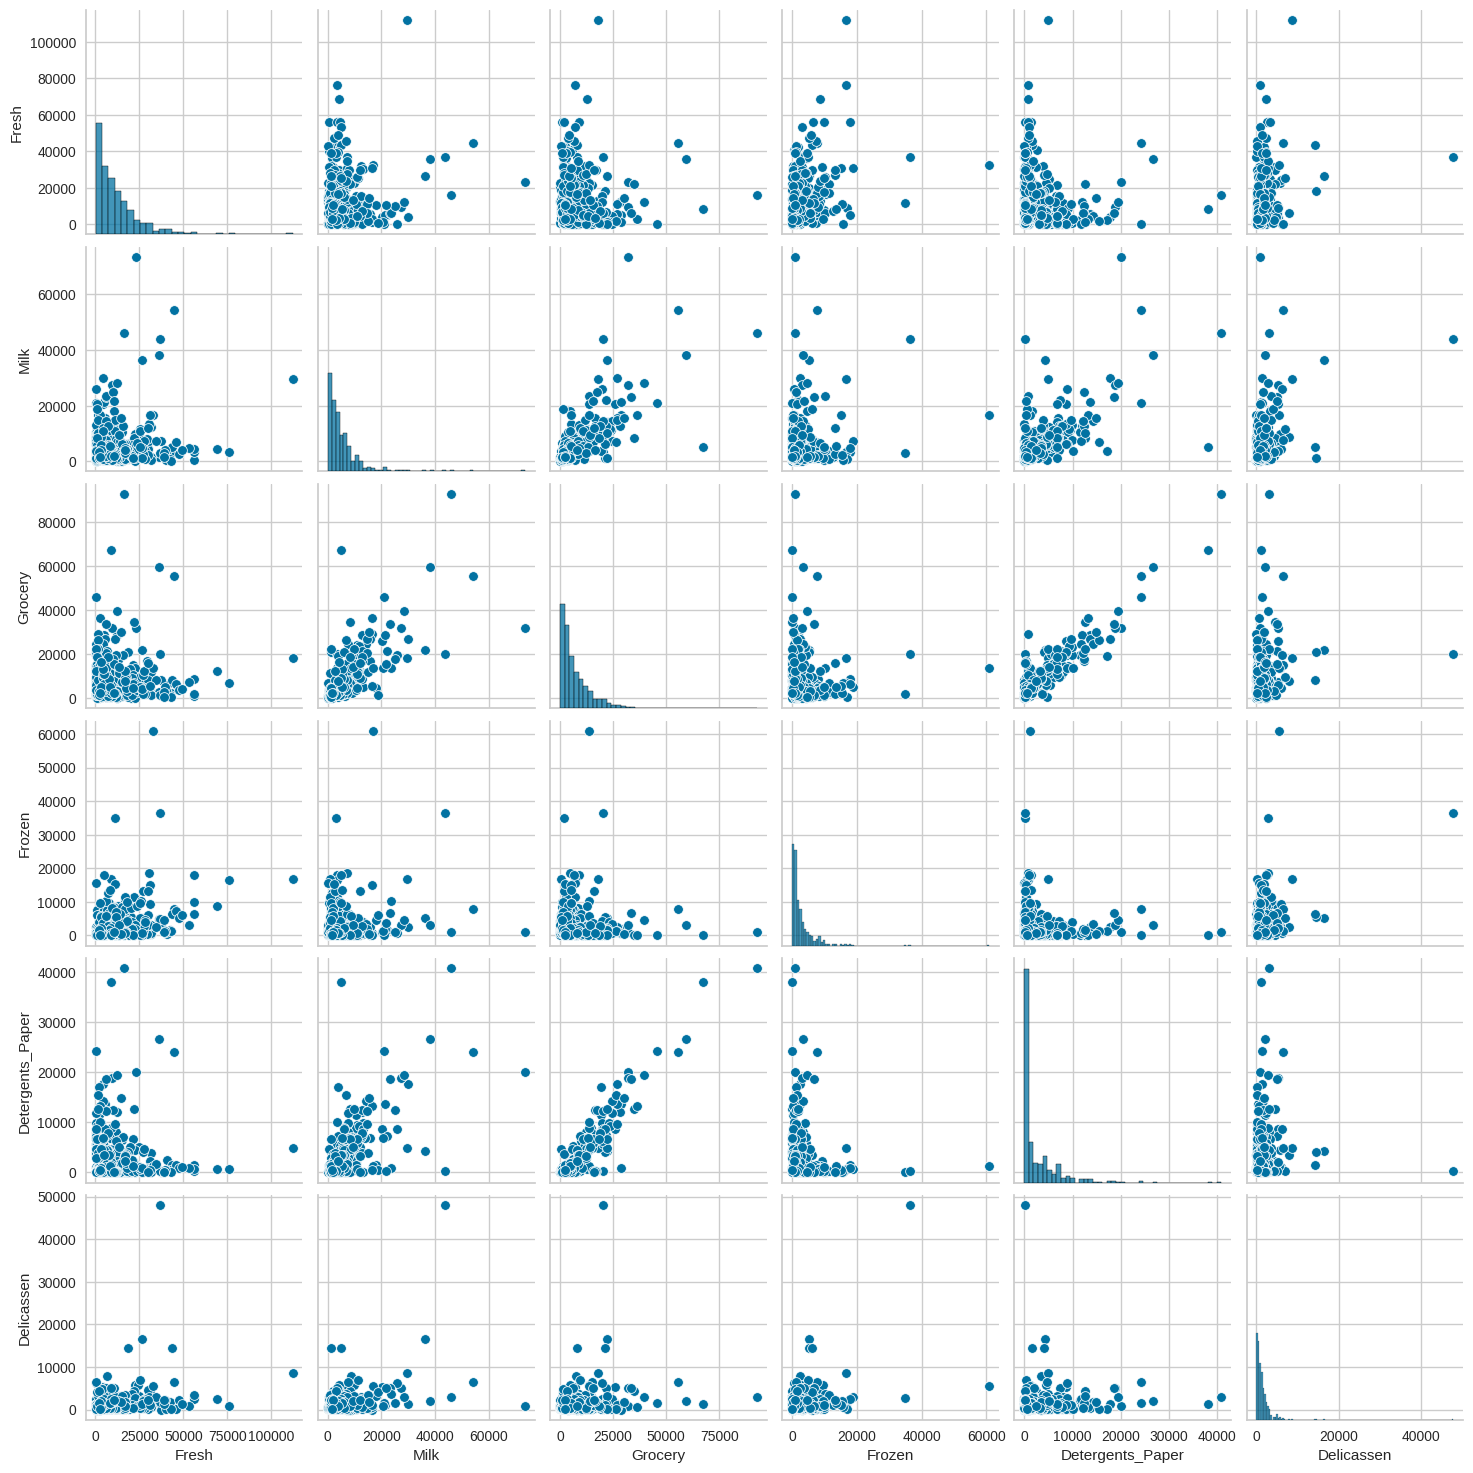

In [100]:
sns.pairplot(dfnum)

In [101]:
dfnum.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


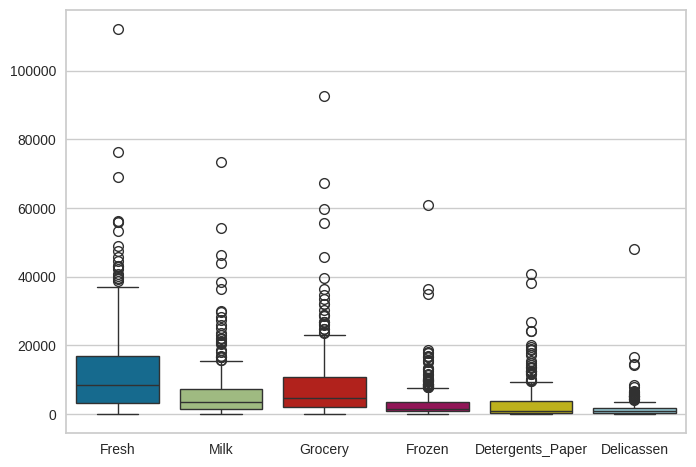

In [102]:

sns.boxplot(dfnum)
plt.show()

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

Grocery y  Detergents Paper tienen una correlacion alta de 0.92

Milk y Grocery  tienen una correlacion alta de 0.73

Detergents Paper con Milk  tienen una alta correlacion de 0.66

Delicatessen tiene un posible valor outsider, un punto de valor elevado aislado

Detergent_papers tiene una gran cantidad de valores muy pequeños

No hay ninguna distribucion normal, todas tienen sesgo positivo

Hay una gran cantidad de outliers en todas las variables

**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper tienen una gran ...
+
+
+



# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

<Axes: >

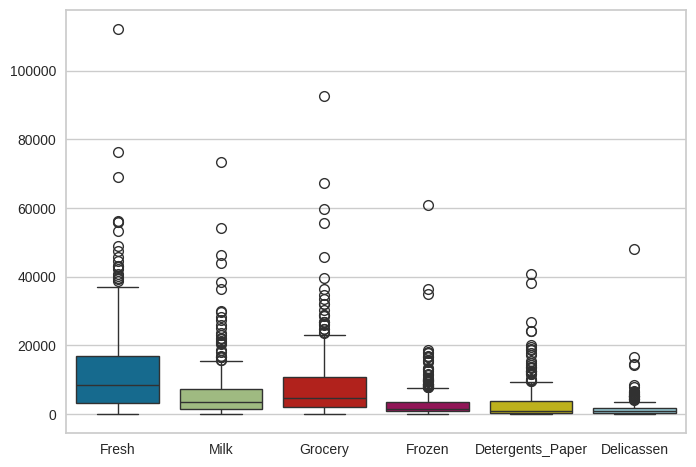

In [103]:
sns.boxplot(dfnum)

In [104]:
# Your code here
dfnum.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [105]:
list(dfnum.columns)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [106]:

for col in list(dfnum.columns):
  # Calcular los percentiles
  seventy_fifth = dfnum[col].quantile(0.75)
  twenty_fifth = dfnum[col].quantile(0.25)
  # Obtain IQR
  iqr = seventy_fifth - twenty_fifth
  # Upper and lower thresholds
  upper = seventy_fifth + (1.5 * iqr)
  lower = twenty_fifth - (1.5 * iqr)

  print (f'upper: {upper} lower:{lower}')
  # Subset the dataset
  #outliers = dfnum[(dfnum[col]< lower) | (dfnum[col]> upper)]
  #numerical = numerical[(numerical[columna] >= lower) & (numerical[columna] <= upper)]
  #numerical.shape

  dfnum = dfnum[(dfnum[col] >= lower) & (dfnum[col] <= upper)]
  dfnum.shape

  #outliers.head()
  #print (outliers.count())

upper: 37642.75 lower:-17581.25
upper: 15894.25 lower:-7083.75
upper: 20928.625 lower:-9198.375
upper: 7106.0 lower:-3198.0
upper: 8445.0 lower:-4685.0
upper: 3300.25 lower:-1377.75


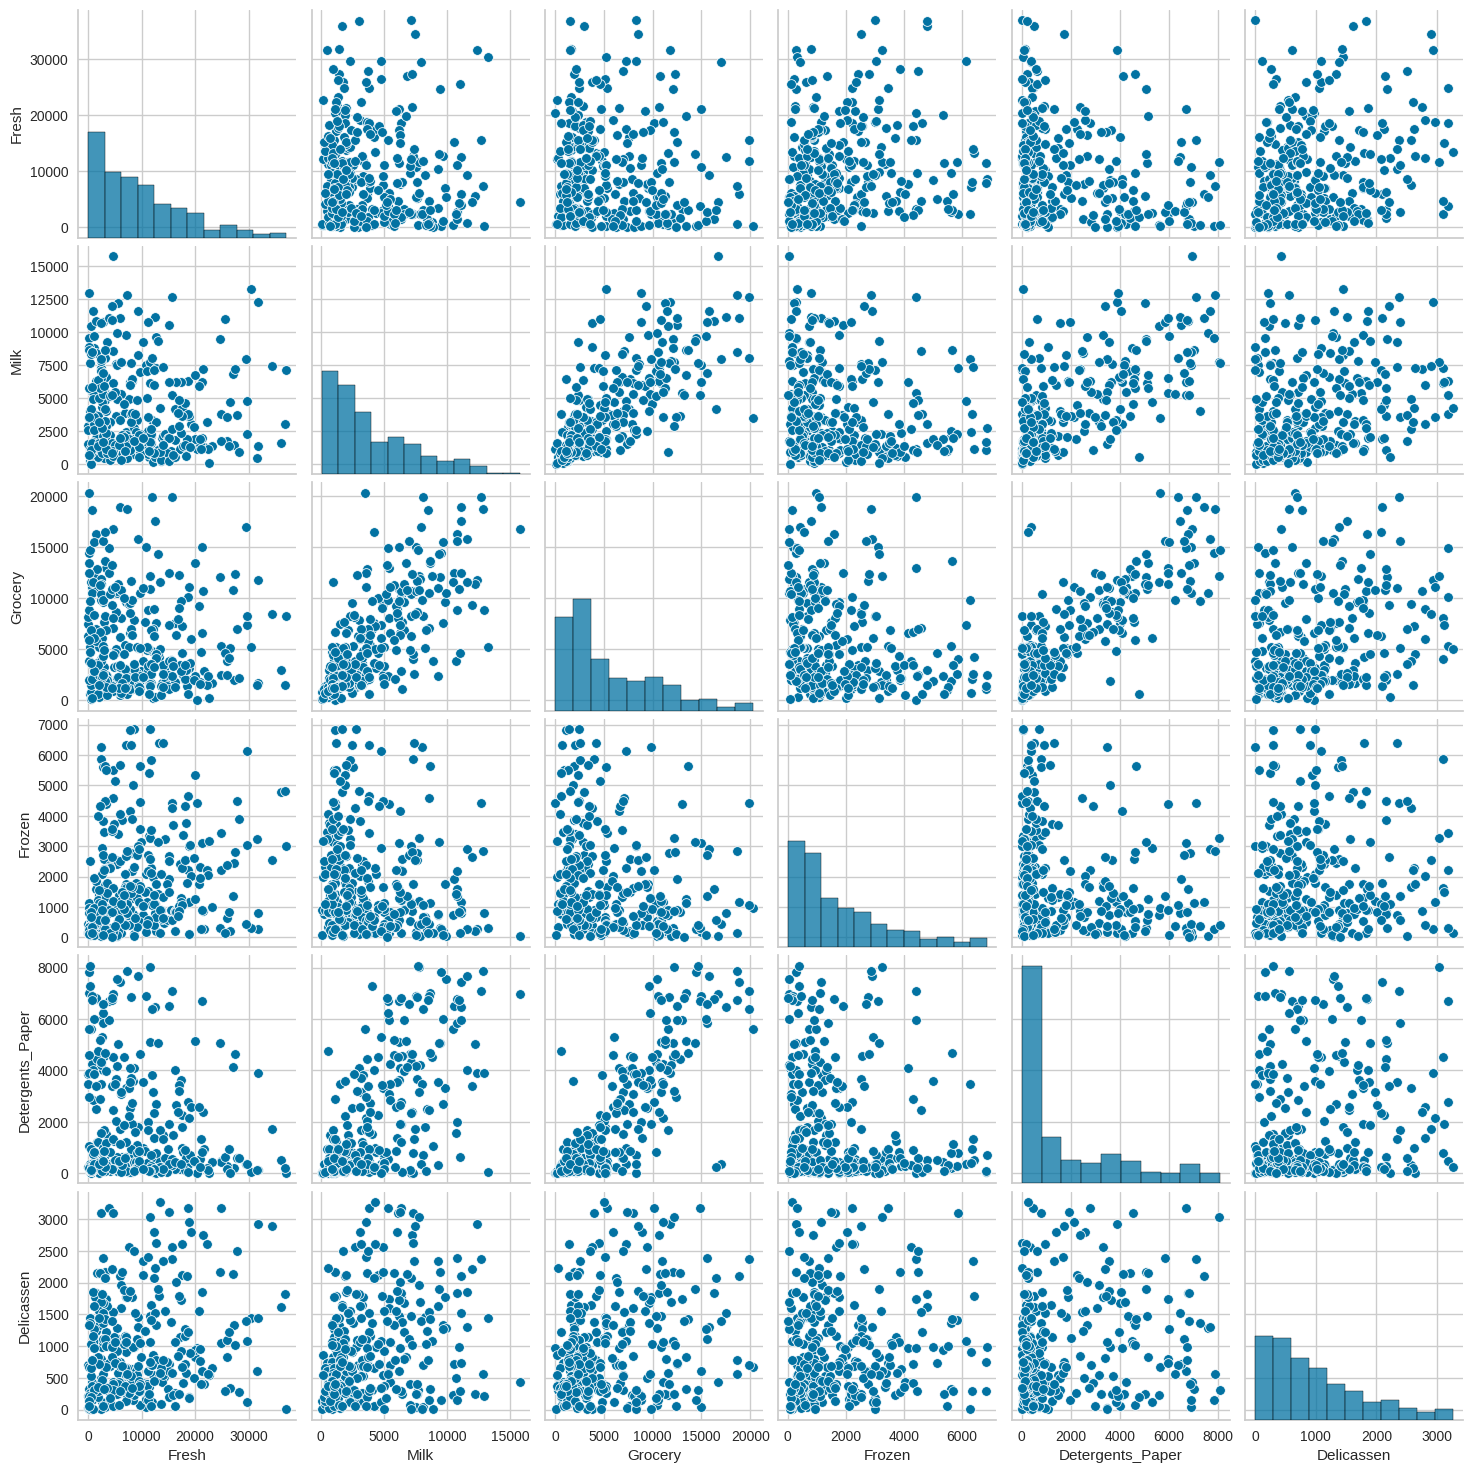

In [107]:
sns.pairplot(dfnum)

<Axes: >

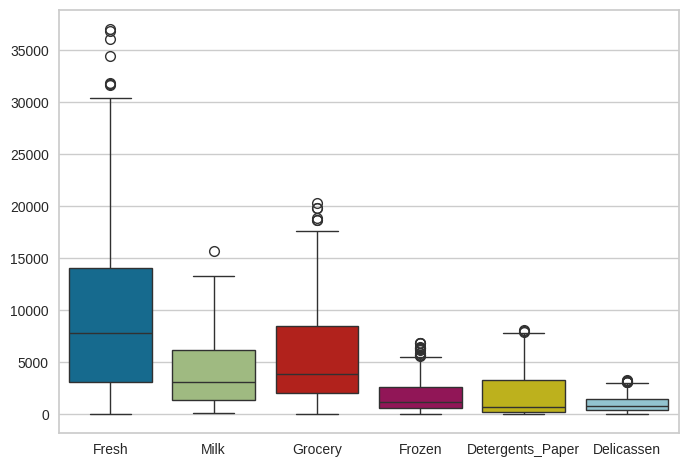

In [108]:
sns.boxplot(dfnum)

**Tus observaciones aquí**

+ Parece que...
+
+

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [109]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
customers_scale = scaler.fit_transform(dfnum)
customers_scale

array([[ 0.36041979,  1.74071034,  0.43271395, -0.98480101,  0.37827742,
         0.45117793],
       [-0.32503941,  1.78801539,  0.86752557, -0.0233858 ,  0.65924069,
         1.00971769],
       [ 0.43321624, -0.8579957 , -0.29088884,  2.85961769, -0.60532095,
         1.02502015],
       ...,
       [ 0.85655936, -0.02063486,  0.52652234, -0.69041418,  0.24074613,
        -0.18642453],
       [ 0.06984469, -0.61686281, -0.7218008 , -0.47303994, -0.75919259,
         1.45476421],
       [-0.84658446, -0.70379352, -0.66157279, -1.07734033, -0.61893791,
        -1.18873561]])

# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [110]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

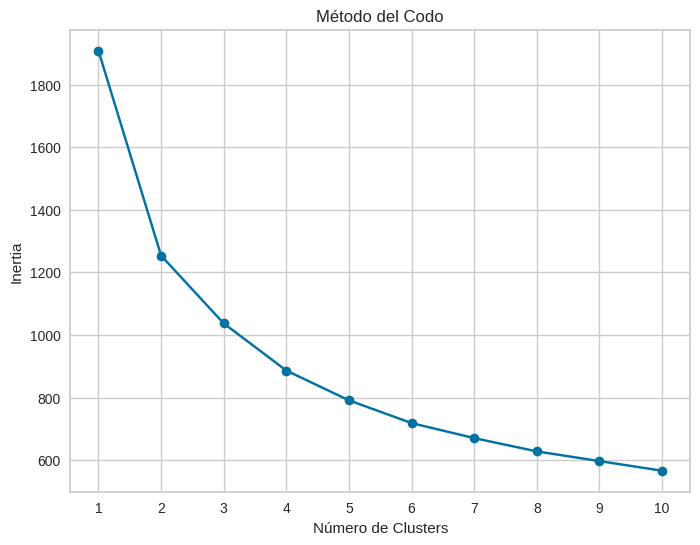

In [111]:
# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

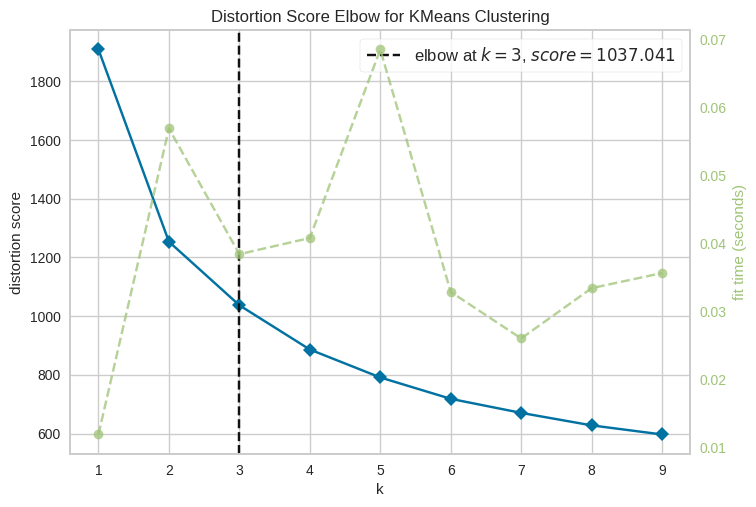

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(customers_scale)
visualizer.show()

### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [113]:
kmeans_2 = KMeans(n_clusters=3).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [114]:
len(clusters)

318

In [115]:
#clean_customers['Label'] = clusters
dfnum['Label']  = clusters


In [116]:
labels2 = kmeans.labels_
centers = kmeans.cluster_centers_

In [117]:
centers[:5]

array([[ 1.30951506,  0.59020099,  0.48501427, -0.18557688,  0.01298988,
         1.83642832],
       [-0.41838319, -0.80281224, -0.81024182, -0.2524029 , -0.6603194 ,
        -0.74115664],
       [-0.48055527,  0.22712878,  0.43886973, -0.55127325,  0.42945841,
        -0.8639541 ],
       [ 0.14055037,  1.62481478,  2.16173976,  0.50371934,  2.07083878,
         0.63135688],
       [ 1.62696614, -0.59908626, -0.61304374,  0.87702438, -0.67191228,
        -0.11299741]])

In [118]:
labels2[:5]

array([6, 6, 7, 6, 2], dtype=int32)

In [119]:
labels[:5]

array([1, 1, 2, 1, 0], dtype=int32)

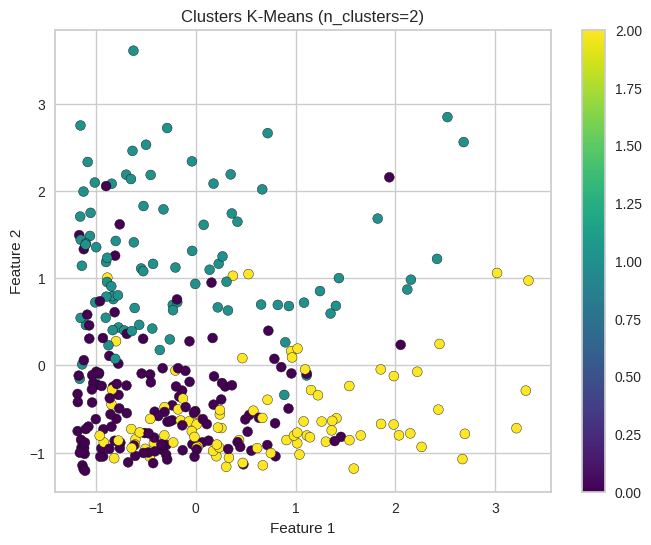

In [120]:
# Graficar los clusters encontrados por K-Means
plt.figure(figsize=(8, 6))

# Colorear los puntos según las etiquetas de los clusters
plt.scatter(customers_scale[:, 0], customers_scale[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

# Colocar los centroides de los clusters
#plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=200, label='Centroides')

plt.title('Clusters K-Means (n_clusters=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.legend()
plt.show()

Cuenta los valores en `labels`.

In [121]:
# Your code here:
len(labels)

318

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [122]:
from sklearn.cluster import DBSCAN

# Your code here

# It's often a good idea to scale the data for clustering algorithms
X_scaled = StandardScaler().fit_transform(customers_scale)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [123]:
len(clusters)

318

In [124]:
dfnum['labels_DBSCAN']=clusters
dfnum.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,1,-1
1,7057,9810,9568,1762,3293,1776,1,-1
3,13265,1196,4221,6404,507,1788,2,-1
5,9413,8259,5126,666,1795,1451,1,-1
6,12126,3199,6975,480,3140,545,0,-1


In [125]:
dfnum['Label'].value_counts()

Label
0    137
2     91
1     90
Name: count, dtype: int64

In [126]:
dfnum['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    282
 0     23
 1     13
Name: count, dtype: int64

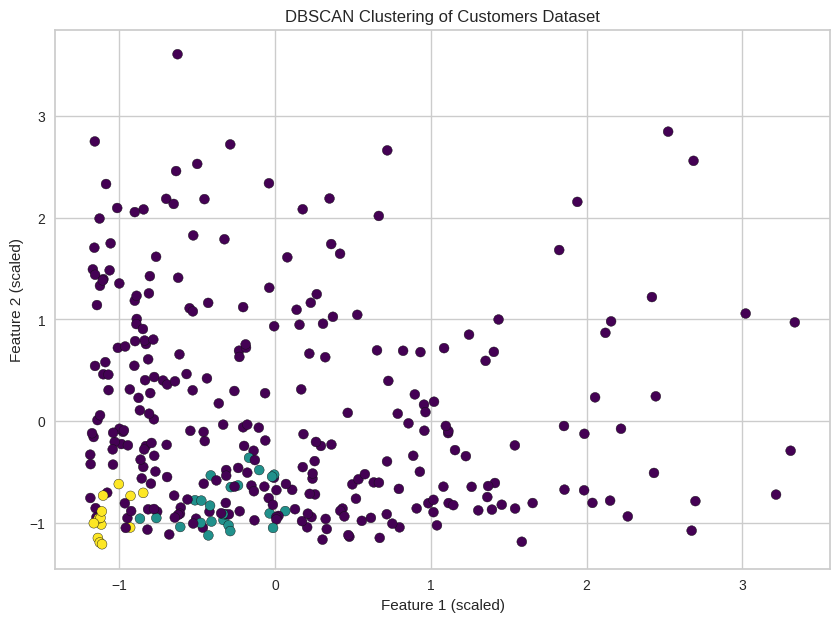

Estimated number of clusters: 2
Estimated number of noise points: 282


In [127]:
# Plotting the clustering result
plt.figure(figsize=(10, 7))
# The Iris dataset has 4 features, for simplicity, we'll plot two dimensions
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Customers Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Analyzing the results
# -1 in clusters represents outliers detected by DBSCAN
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Cuenta los valores en `labels_DBSCAN`.

In [128]:
# Your code here
len(dfnum['labels_DBSCAN'])

318

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [147]:
def plot(x,y,hue,title):
    sns.scatterplot(x=x,
                    y=y,
                    hue=hue)
    plt.title(title)
    return plt.show();

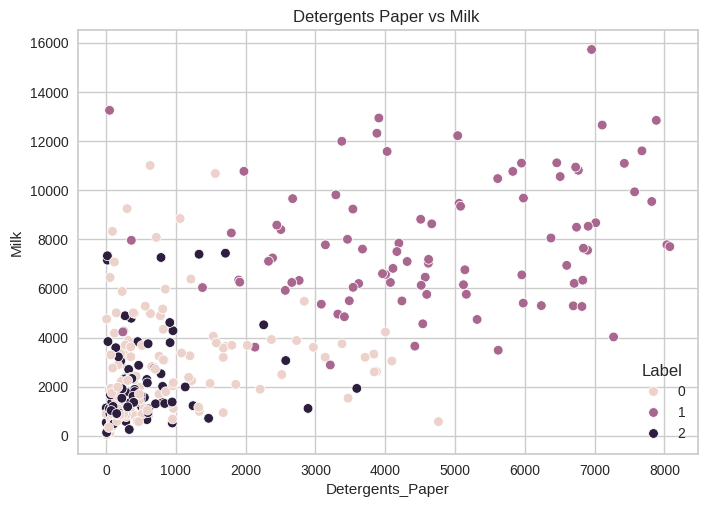

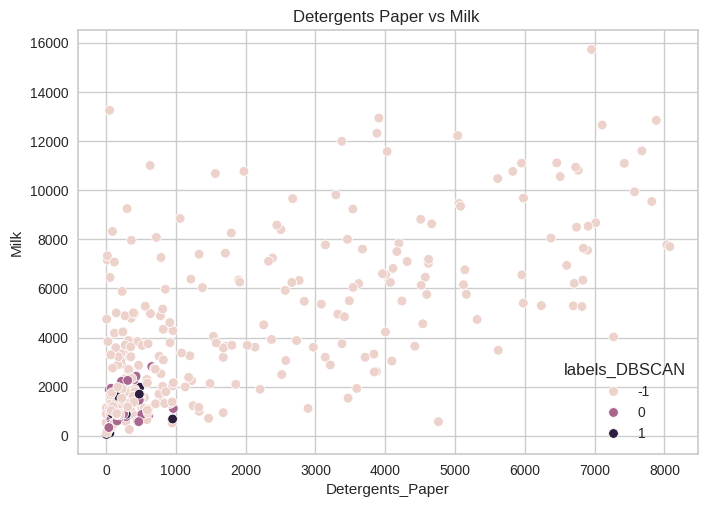

In [152]:
# Your code here:
plot(x=dfnum['Detergents_Paper'],y=dfnum['Milk'],hue=dfnum["Label"],title='Detergents Paper vs Milk ')
plot(x=dfnum['Detergents_Paper'],y=dfnum['Milk'],hue=dfnum["labels_DBSCAN"],title='Detergents Paper vs Milk ')

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

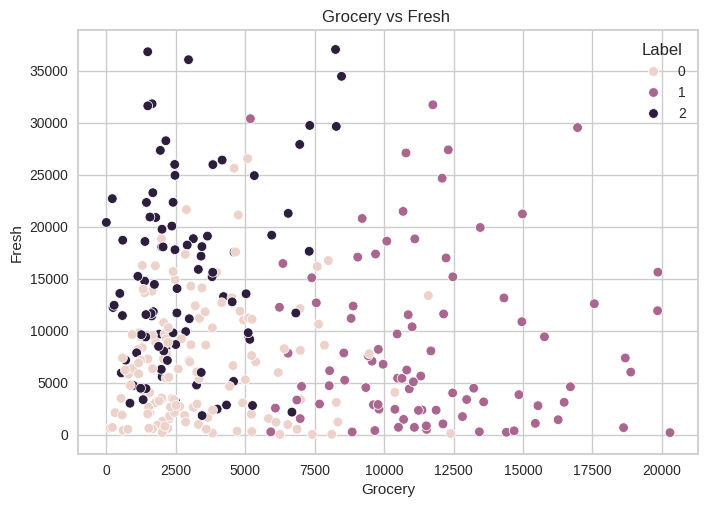

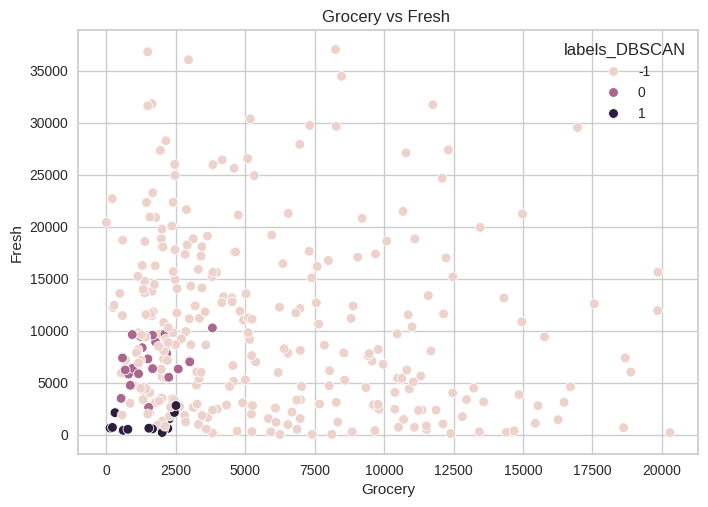

In [153]:
plot(x=dfnum['Grocery'],y=dfnum['Fresh'],hue=dfnum["Label"],title='Grocery vs Fresh ')
plot(x=dfnum['Grocery'],y=dfnum['Fresh'],hue=dfnum["labels_DBSCAN"],title='Grocery vs Fresh ')

In [ ]:
# Your code here:


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

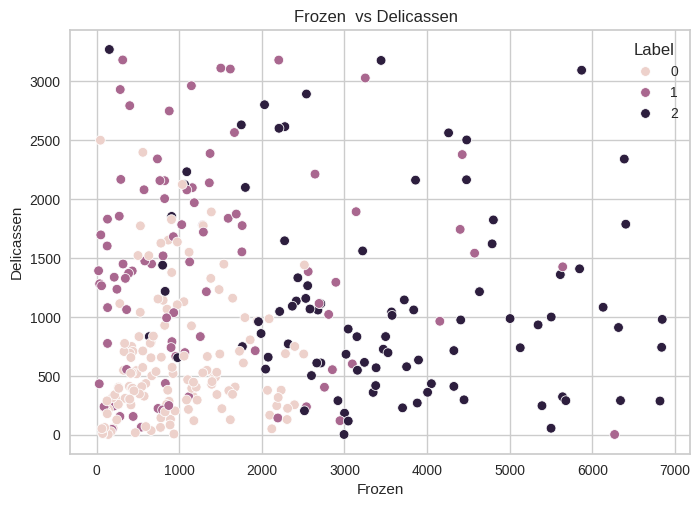

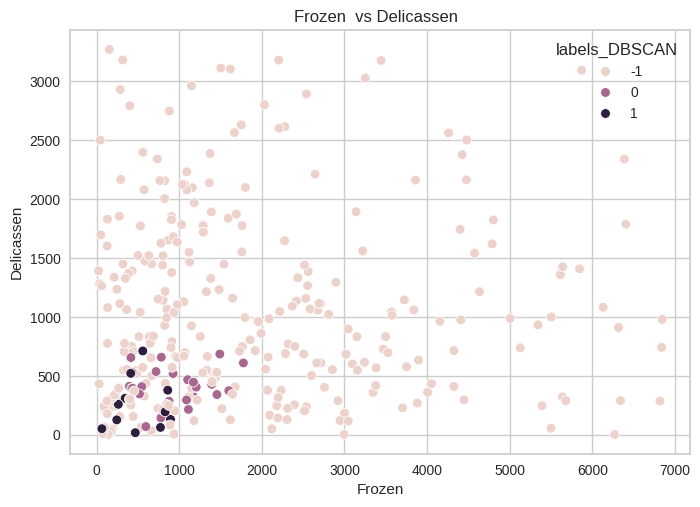

In [154]:
# Your code here:
plot(x=dfnum['Frozen'],y=dfnum['Delicassen'],hue=dfnum["Label"],title='Frozen  vs Delicassen  ')
plot(x=dfnum['Frozen'],y=dfnum['Delicassen'],hue=dfnum["labels_DBSCAN"],title='Frozen  vs Delicassen  ')

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [155]:
# Your code here:
dfnum.groupby('Label').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Label,,,,,,,
0,6817.854015,2666.145985,3393.934307,953.321168,847.678832,622.226277,-0.642336
1,8444.433333,7868.100000,11551.566667,1343.744444,4688.611111,1393.900000,-1.000000
2,15344.307692,2144.692308,2908.142857,3524.703297,518.736264,1123.923077,-1.000000


In [156]:
dfnum.groupby('labels_DBSCAN').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
labels_DBSCAN,,,,,,,
-1,10335.216312,4348.946809,6071.492908,1929.301418,2039.893617,1064.670213,0.964539
0,7076.521739,1302.652174,1666.000000,956.652174,305.826087,415.826087,0.000000
1,1006.615385,938.000000,1444.000000,478.769231,232.923077,244.000000,0.000000


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
